In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv("Ads_CTR_Optimisation.csv")

In [33]:
data.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [62]:
data.sum(axis=0)

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

## implementing random selection

In [22]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0 
for i in range(N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data.values[i, ad]
    total_reward = total_reward + reward

In [25]:
total_reward

1213

## visualising the results

Text(0.5, 0, 'Ads')

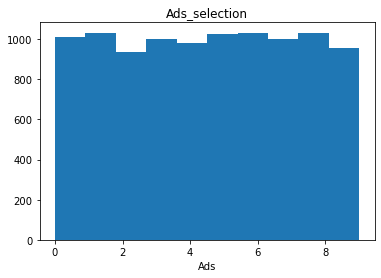

In [24]:
plt.hist(ads_selected)
plt.title("Ads_selection")
plt.xlabel("Ads")

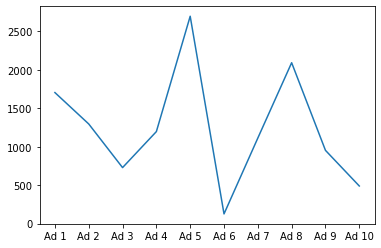

In [38]:
plt.plot(data.columns, data.sum(axis=0))

## Upper Confidence Bound

In [39]:
import math

In [44]:
N = 10000
d = 10
number_of_selections = [0]*d
sum_of_rewards = [0]*d
ads_selected2 = []
total_reward = 0
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if (number_of_selections[i] > 0):
            average_reward = sum_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        ads_selected2.append(ad)
        number_of_selections[ad] = number_of_selections[ad] + 1
        reward = data.values[n, ad]
        sum_of_rewards[ad] = sum_of_rewards[ad] + reward
        total_reward+=reward
        

In [45]:
sum_of_rewards

[5570, 335, 93, 419, 15402, 5, 26, 332, 45, 11]

In [46]:
total_reward

22238

In [60]:
ads_selected2[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Text(0.5, 0, 'Ads')

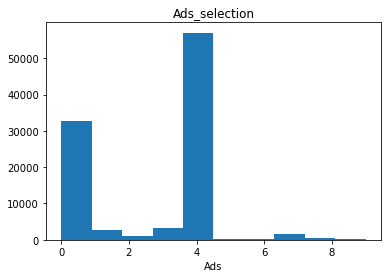

In [61]:
plt.hist(ads_selected2)
plt.title("Ads_selection")
plt.xlabel("Ads")